<div style="background-color:red; color:white; padding:30px; font-size:30px; text-align:center; font-family:'Poppins'"> 
    1 | Exploratory Data Analysis & Pre-pro
</dib>

<div style="background-color:white; color: red; padding:25px; font-size:20px; ; font-family:'Poppins'"> 
    Bivariate Analyisis
</dib>

In [51]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [52]:
df = pd.read_csv('dataset\Riskrating.csv')

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\Acer\AppData\Local\Temp\ipykernel_1560\1512743427.py:1: SyntaxWarning: invalid escape sequence '\R'
  df = pd.read_csv('dataset\Riskrating.csv')


In [53]:
df.head()

,contractcode,income,tenor,dependents,midoverdue,riskrating,age,empyear,asset,debt
0,AGR-000001,295,48,5,76,4,55,12,892.926628,4.698371
1,AGR-000011,271,36,5,76,4,53,10,905.822473,4.063852
2,AGR-000030,159,12,0,0,1,35,5,551.726091,0.050000
3,AGR-000043,210,12,3,53,3,45,7,791.112405,0.721384
4,AGR-000049,165,36,0,38,2,36,5,592.650130,0.066667


In [54]:
df['riskrating'].value_counts()
def sampling(df, col, ratio=0.6):
    classes = np.unique(df[col])
    indices = []
    for cls in classes:
        index = df[df[col] == cls].index.tolist()
        count = int(len(index) * ratio)
        np.random.shuffle(index)
        indices.append(index[:count])
    return indices

indices = sampling(df, 'riskrating')
indices = [index for index_list in indices for index in index_list]
df_clean = df.copy()
df_clean = df_clean.iloc[indices].reset_index(drop=True)

In [ ]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['figure.titlesize'] = (20)
plt.rcParams['figure.titleweight'] = 'bold'

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   contractcode  900 non-null    object 
 1   income        900 non-null    int64  
 2   tenor         900 non-null    int64  
 3   dependents    900 non-null    int64  
 4   midoverdue    900 non-null    int64  
 5   riskrating    900 non-null    int64  
 6   age           900 non-null    int64  
 7   empyear       900 non-null    int64  
 8   asset         900 non-null    float64
 9   debt          900 non-null    float64
dtypes: float64(2), int64(7), object(1)
memory usage: 70.4+ KB


In [73]:
df['midoverdue'].unique()

array([76,  0, 53, 38, 15, 91], dtype=int64)

df_clean.asty

In [57]:
df_clean[['riskrating', 'midoverdue']] = df_clean[['riskrating', 'midoverdue']].astype('object')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   contractcode  538 non-null    object 
 1   income        538 non-null    int64  
 2   tenor         538 non-null    int64  
 3   dependents    538 non-null    int64  
 4   midoverdue    538 non-null    object 
 5   riskrating    538 non-null    object 
 6   age           538 non-null    int64  
 7   empyear       538 non-null    int64  
 8   asset         538 non-null    float64
 9   debt          538 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 42.2+ KB


In [58]:
numeric_data = df_clean.select_dtypes(include='number')
categorical_data = df_clean.select_dtypes(include='object')

In [59]:
numeric_data

,income,tenor,dependents,age,empyear,asset,debt
0,154,24,0,34,5,517.208261,0.050000
1,182,24,2,40,6,699.162456,1.794250
2,204,36,1,45,6,854.126756,0.921865
3,179,36,2,39,6,654.085789,1.578298
4,192,12,1,42,6,737.007355,0.903424
...,...,...,...,...,...,...,...
533,158,36,5,34,5,512.627085,14.023850
534,160,36,6,37,4,661.674556,14.662148
535,238,36,6,50,8,930.997302,17.814604
536,145,48,6,34,4,561.218980,20.172069


## Early Hypotheses

| Early Hipotesa         | Reason                                      |
|---------------|--------------------------------------------------|
| Older People has more dependet, income and assets  | have more experience             |
| Lower assets or Income more risk        | longer time to return the money               |
| Have correlation to income and assets         | Some of people might buy more assets to inverst theoir money                        |
| Huge Debt / mideoverdue more risk    | if client to many borrow money with high overdue, it will risk                           |
| High depent more risk    | Client have a more responsibilites to handle              |


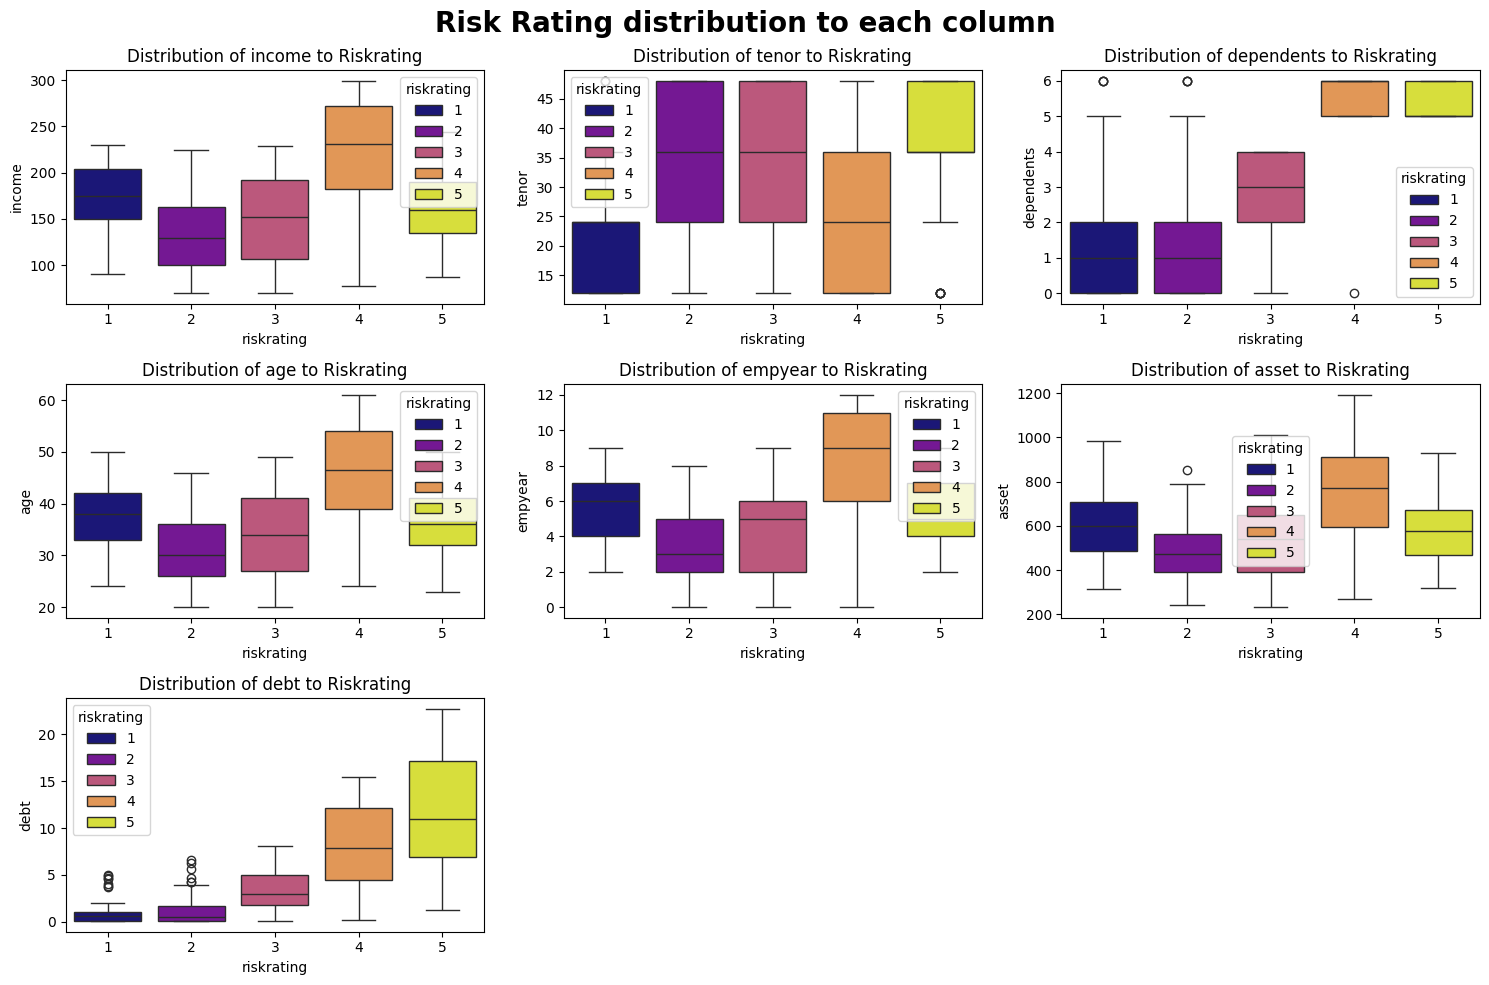

In [66]:
for i, col in enumerate(numeric_data):
    plt.subplot(3, 3, i+1)
    sns.boxplot(numeric_data, x=df_clean['riskrating'], y=col, hue=df_clean['riskrating'], palette='plasma')
    plt.title(f'Distribution of {col} to Riskrating')

plt.suptitle("Risk Rating distribution to each column")
plt.tight_layout()
plt.show()


### 1. Older People has more dependet, income and assets

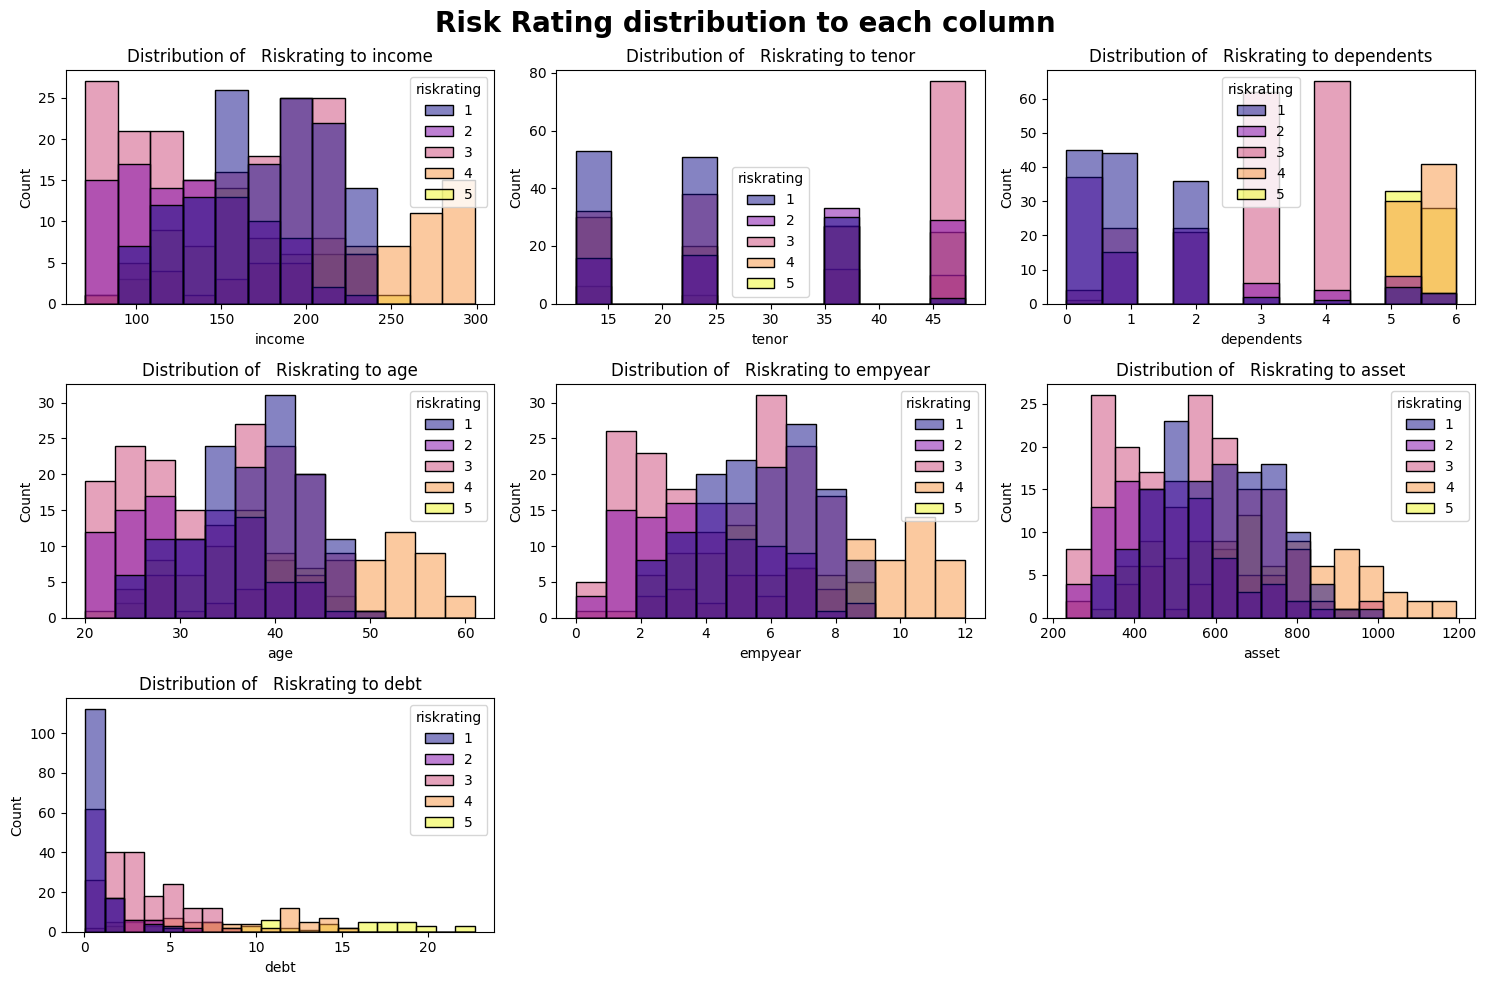

In [68]:
for i, col in enumerate(numeric_data):
    plt.subplot(3, 3, i+1)
    sns.histplot(numeric_data, x=col, hue=df_clean['riskrating'], palette='plasma')
    plt.title(f'Distribution of   Riskrating to {col}')

plt.suptitle("Risk Rating distribution to each column")
plt.tight_layout()
plt.show()


In [71]:
df_clean['midoverdue']

0      15
1      15
2      15
3      15
4      15
       ..
533    91
534    91
535    91
536    91
537    91
Name: midoverdue, Length: 538, dtype: object

<Axes: xlabel='riskrating', ylabel='midoverdue'>

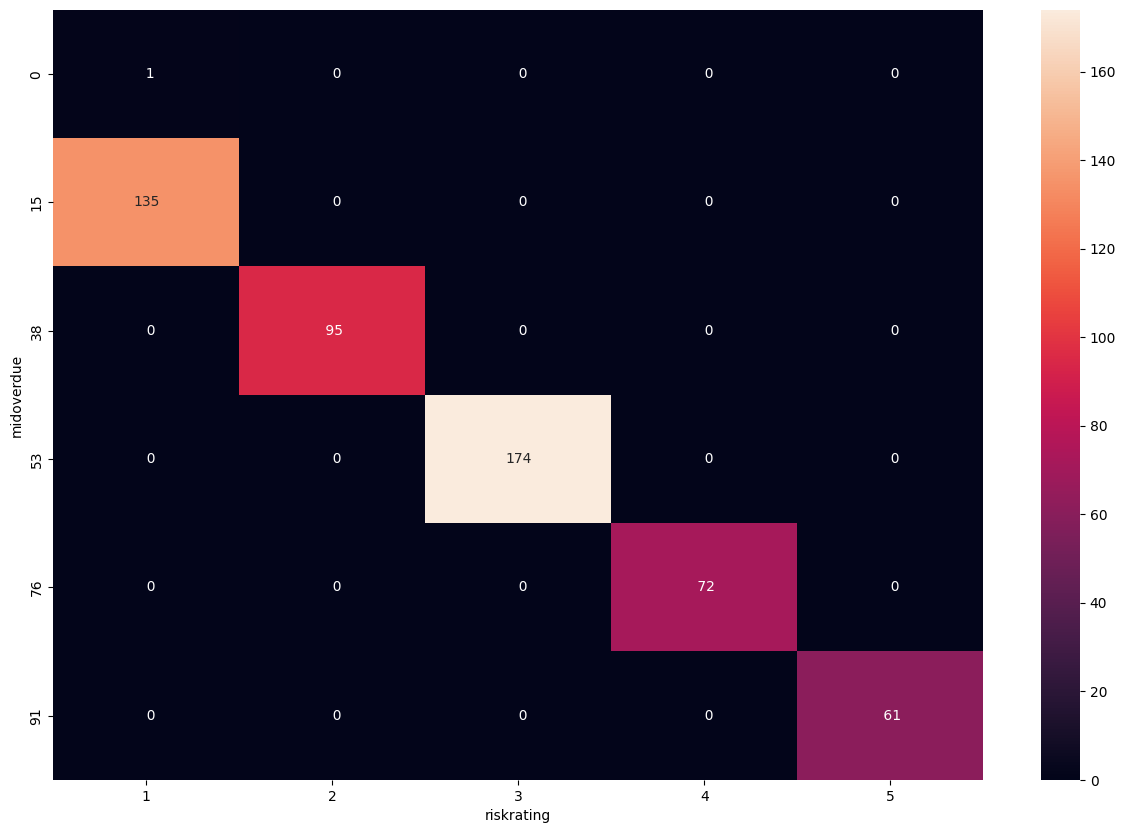

In [70]:
sns.heatmap(pd.crosstab(df_clean['midoverdue'], df_clean['riskrating']), annot=True, fmt="3")

## Hypotheses vs The Fact

| Early Hipotesa         | Result                                      |
|---------------|--------------------------------------------------|
| Older People has more dependet, income and assets  | Yes for only dependentm while income and assets hove more in 'prime age' range 50 and above 30          |
| Lower assets or Income more risk        |  assets and income correleted with age prime age            |
| Have correlation to income and assets         | Some of people might buy more assets to inverst theoir money                        |
| Huge Debt / mideoverdue more risk    | Yes for Debt, but not for overdue, overdue not linear correlated                           |
| High depentt more risk    | Yes and exact            |


## Conclusions & Key Insight
- While not significant correleted, but the more `Income`, `Age`, `Assets`, `dependents` and `debt`, the more risk
- that makes unique low riskrating there in mean of data sepcific in age, the range is around from below 50 and above 30
- but specific in debt, more debt in out of this bank, the more risk

Conculsion: stable income and low riskrating is dominated in around from below 50 and above 30, that effect to  `Income`, `Age`, `Assets`,  but with low `debt` and `dependent`

In [75]:
df.columns

Index(['contractcode', 'income', 'tenor', 'dependents', 'midoverdue',
       'riskrating', 'age', 'empyear', 'asset', 'debt'],
      dtype='object')

In [ ]:
feature_names = ['contractcode', 'income', 'tenor', 'dependents', 'midoverdue',  'age', 'empyear', 'asset', 'debt']
target_col = 'riskrating'

In [ ]:
from matplotlib.patches import ConnectionPatch, Patch
from collections import deque, Counter

In [ ]:
class TreeVisualization:
    def __init__(self, tree, data_df, target_col, feature_names):
        self.tree = tree
        self.data_df = data_df
        self.target_col = target_col
        self.feature_names = feature_names
        self.mode = tree.mode
        self.node_cache = {}
        self.palette = self._create_color_palette()
        self._cache_nodes(tree.root)

    def entropy(self, y):
        classes = np.unique(y)
        entropy = 0
        for cls in classes:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log(p_cls)
        return entropy
    
    def gini(self, y):
        classes = np.unique(y)
        gini = 0
        for cls in classes:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls ** 2
        return gini
    
    def _calcluate_impurity(self, y):
        return self.gini(y) if self.mode == 'gini' else self.entropy(y)
    
    def _create_color_palette(self):
        classes = np.unique(self.data_df[self.target_col])
        return dict(zip(classes, sns.palettes("Set2", n_colors=len(classes))))
    
    def _cache_nodes(self, root):
        queue = deque([root])
        while queue:
            node = queue.popleft()
            self.node_cache[id(node)] = node
            if getattr(node, 'left', None):
                queue.extend([node.left, node.right])
    def get_prediction_path(self, x):
        path, decisions = [], []
        node = self.tree.root
        while node.value is None:
            path.append(node)
            feature_val = x[node.feature_index]
            val_str = f'{feature_val:.2f}' if isinstance(feature_val, (int, float)) else str(feature_val)
            thresh_str = f'{node.threshold:.2f}' if isinstance(node.threshold, (int, float)) else str(node.threshold)
            op = "<=" if feature_val <= node.threshold else ">"
            decisions.append(f'Step {len(path)}:{self.feature_names[node.feature_index]} = {val_str} {op} {thresh_str}' )
            node = node.left if feature_val <= node.threshold else node.right
        path.append(node)
        decisions.append(f'Final: Class {node.value}')
        return path, decisions

    def plot_prediction_path(self, x=None, step=None, fig=None, ax=None):
        fig = fig or plt.figure(figsize=(12,8))
        ax = ax or fig.add_subplot(111)
        ax.clear(), ax.set_axis_off()

        node_width, node_height, level_height = 0.15, 0.1, 0.2
        node_boxes, path_ids = {}, {}

        def get_node_positions(node, level=0, x_pos=0.5):
            pos = {id(node):{x_pos, 1 - level*level_height}}
            if getattr(node, 'left', None):
                spacing = 0.24/(level+1)
                pos.update(get_node_positions(node.left, level+1, x_pos-spacing))
                pos.update(get_node_positions(node.right, level+1, x_pos+spacing))
            return pos 
        
        node_positions = get_node_positions(self.tree.root)
        if x is not None:
            prediction_path, decision = self.get_prediction_path(x)
            if step is not None:
                prediction_path = prediction_path[:step]
            path_ids = {id(n) for n in prediction_path}
        
        for node_id, (x_pos, y) in node_positions.items():
            node = self.node_cache[node_id]
            node_boxes[node_id] = [x_pos - node_width/2, y - node_height/2, node_width, node_height]
            node_ax  = fig.add_axes([x_pos - node_width/2, y - node_height/2, node_width, node_height])
            if node.value is not None:
                self._draw_leaf_node(node_ax, node, node_id in path_ids)
            else:
                self._draw_decision_node(node_ax, node, node_id in path_ids)

        self._draw_connections(node_positions, node_boxes, path_ids)
        legend_elements = [
            Patch(facecolor=self.palette[cls], alpha=0.3, label=cls)
            for cls in sorted(self.data_df[self.target_col].unique())
        ]
        ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.2, 1.2), title="Risk Rating")

        if x is not None:
            title = (f'Decision Tree Path - step {step} of {len(decision)}'
                    if step is not None else f'Complate Decision Path\mFinal Prediction: RiskRating {self.tree.predict(x)[0]}')
        else:
            title = f"Complate Decision Tree Visualization\Impurity Mearsure" {self.mode.capitlize()}
        
        fig.suptitle(title, fontsize=25, y=1.2)
        return fig, ax
    
    def _draw_leaf_node(self, ax, node, is_active):
        ax.axis('off')
        color, width = ('red', 2) if is_active else ('black', 1)
        dist = Counter(node.sample)
        txt = f'Risk Rating {node.value}\n' + '\n'.join(f"Risk Rating {k}: {v}" for k, v in dist.items())
        txt += f'\n{self.mode}: {self._calcluate_impurity(node.sample):.3f}'
        bg_color = self.palette[max(dist, key=dist.get)]
        ax.text(0.5, 0.5, txt, ha='center', va='center', bbox=dict(boxstyle='round', fc=(*bg_color, 0.3), color=color, linewidth=width), fontsize=8)

    def _draw_decision_node(self, ax, node, is_active):
        color, width = ('red', 2) if is_active else ('black', 1)
        sns.histplot(data=self.data_df, x=self.feature_names[node.feature_index],
                     hue=self.target_col, palette=self.palette, multiple='stack', ax=ax)
        ax.set(xlabel='', ylabel='')
        ax.axvline(node.threshold, color=color, linestyle='--', linewidth=width)
        if ax.get_legend(): ax.get_legend().remove()
        dist = Counter(node.sample)
        thresh_str = f'{node.threshold:.2f}' if isinstance(node.threshold, (int, float)) else str(node.threshold)
        title = (f'{self.feature_names[node.feauture_index]} <= {thresh_str} \n' +
                 ' '.join(f'Risk Rating {k}: {v}' for k, v in dist.items()) +
                 f'\n{self.mode}: {self._calcluate_impurity(node.sample):.3f}')
        ax.set_title(title, fontsize=8, color=color)
    
    def _draw_connetions(self, positions, boxes, path_ids, main_ax):
        for node_id, _ in positions.items():
            node = self.node_cache[node_id]
            if getattr(node, 'left', None):
                for child in [node.left, node.right]:
                    is_active = node_id in path_ids and id(child) in path_ids
                    self._draw_connetion(node, child, boxes, is_active, main_ax)
    def _draw_connection(self, parent, child, boxes, is_active, main_ax):
        color, width = ('red', 2) if is_active else ('black', 1)
        p_box, c_box = boxes[id(parent)], boxes[id(child)]
        con = ConnectionPatch(xyA=(p_box[0] + p_box[2]/2, p_box[1]),
                              xyB=(p_box[0] + p_box[2]/2, p_box[1] + c_box[3]),
                                   axesA=main_ax, axesB=main_ax,
                                   coordsA='figure fraction', coordsB='figure fraction',
                                   arrowstyle=main_ax, color=color, linewidth=width)
        main_ax.add_artist(con)


In [ ]:
X = data_df = df_clean[feature_names].values
Y = data_df[target_col].values

model = DecisionTreeClassifier(max_depth=float('inf'), min_sample_split=2, min_sample_leaf=1, features=None, mode='entropy')
data = cross_validation(X, Y, model, k=5, prune='CCP', alpha=10)

data_df = pd.DataFrame(data['X_train'], columns=feature_names)
data[target_col] = data['y_train'].flatten()

viz = TreeVisualization(model, data_df, target_col, feature_names)
viz.plot_prediction_path()

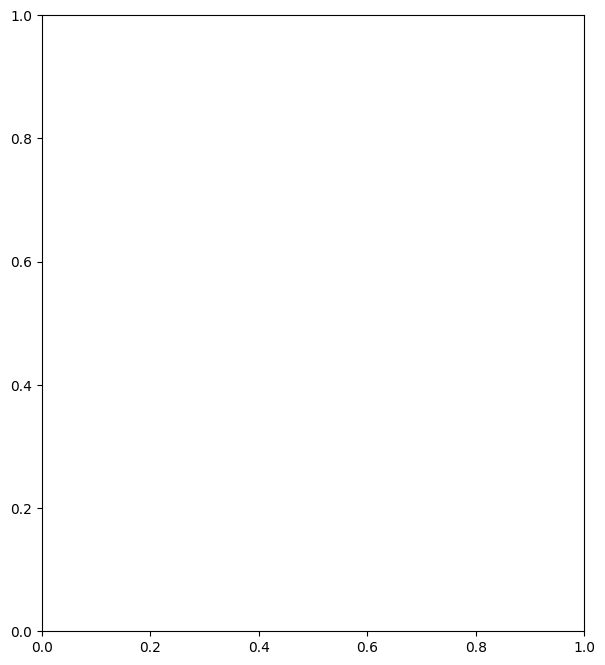

In [103]:
# from tkinter.ttk import *
# import tkinter as tk
# from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
# class TkinterApp:
#     def __init__(self, root):
#         self.root = root    
#         self.root.attributes('-fullscreen', True)
#         self.root.title("Risk Rating Prediction App")
        
#         self.tab_control = Notebook(root)
#         self.predict_tab = Frame(self.tab_control, padding="30")
#         self.history_tab = Frame(self.tab_control, padding="30")
#         self.setting_tab = Frame(self.tab_control, padding="30")

#         style = Style()
#         style.configure('TNotebook.Tab', font=('Poppins', 18), padding="30 10 30 10")
#         style.configure('Label.Text', font=('Poppins', 14))
#         style.configure('Text.Input', font=('Poppins', 15)) 
#         style.configure('Label.Description', font=('Poppins light', 15))
        
#         self.tab_control.add(self.predict_tab, text="Predict")
#         self.tab_control.add(self.history_tab, text="History")
#         self.tab_control.add(self.setting_tab, text="Setting")
#         self.tab_control.pack(anchor='w', fill='x')

#         self.init_predict_tab()
#         self.init_history_tab()
#         self.init_setting_tab()

#     def input_label(self,parent, label, value=None, textvariable=None, type='entry', help_text=None,  col=None, row=None):
#         self.default_value = tk.StringVar(value=textvariable)
#         Label(parent,text=label, font=('Poppins light', 16)).grid(column=col, row=row, sticky='w')
#         if type == "combobox":
#             widget = Combobox(parent, textvariable=self.default_value, value=value, font=('Poppins light', 17)).grid(column=col, row=row+1, sticky='w')
#         else:
#             widget = Entry(parent, textvariable=self.default_value,  font=('Poppins light', 17)).grid(column=col, row=row+1, sticky='w')
        
#         if help_text:
#             Label(parent,text=help_text, font=('Poppins italic', 10)).grid(column=col, row=row+2, sticky='w')
#         return widget
    
#     def init_predict_tab(self):
#         Label(self.predict_tab, text="BI Checking App with Decision Tree Algorithm", font=('Poppins medium', 25)).grid(column=0, row=0, sticky='w')
#         Label(self.predict_tab, text="Give consideration if this type of client suit to give credit or not", font=('Poppins light', 15)).grid(column=0, row=1, sticky='w')

#         frame_input = Frame(self.predict_tab)
#         frame_input.grid(column=1, row=2, sticky='w', )
#         # contractcode	income	tenor	dependents	midoverdue	riskrating	age	empyear	asset	debt
#         self.client_name_entry = self.input_label(frame_input, "Client Name",  help_text="insert the name so easy to search", col=0, row=0) 
#         self.income_entry = self.input_label(frame_input, "Income",  help_text="insert the name so easy to search", col=1, row=0)
#         self.tenor_entry = self.input_label(frame_input, "Tenor",  help_text="insert the name so easy to search", col=2, row=0)
#         self.midoverdue_entry = self.input_label(frame_input, "Midoverdue",  help_text="insert the name so easy to search", col=3, row=0)

#         self.age_entry = self.input_label(frame_input, "Age",  help_text="insert the name so easy to search", col=0, row=3)
#         self.empyear_entry = self.input_label(frame_input, "Employe Year",  help_text="insert the name so easy to search", col=1, row=3)
#         self.asset_entry = self.input_label(frame_input, "Total Asset",  help_text="insert the name so easy to search", col=2, row=3)
#         self.debt_entry = self.input_label(frame_input, "Total Debt",  help_text="insert the name so easy to search", col=3, row=3) 

#         Button(frame_input, text="Go Predict", command=self.predict_and_plot, padding="30 10 30 10" ).grid(column=0, row=6, sticky='w')
        
#         self.frame_viz = Frame(self.predict_tab)
#         self.frame_viz.grid(column=0, row=2, pady=(30, 0), sticky='w')

#         self.fig, self.ax =  plt.subplots(figsize=(7,8))
#         self.canvas = FigureCanvasTkAgg(self.fig, self.frame_viz)
#         self.canvas.draw()
#         self.canvas.get_tk_widget().grid(column=0, row=0, sticky='w')

#         self.frame_result = Frame(frame_input)
#         self.frame_result.grid(column=1, row=8)

#     def predict_and_plot(self):
#         pass

#     def init_history_tab(self):
#         Label(self.history_tab, text="Check History Prediction", font=('Poppins medium', 25)).grid(column=0, row=0, sticky='w')
#         Label(self.history_tab, text="and compare the performance", font=('Poppins light', 15)).grid(column=0, row=1, sticky='w')

#     def init_setting_tab(self):
#         Label(self.setting_tab, text="Adjust your best Model", font=('Poppins medium', 25)).grid(column=0, row=0, sticky='w')
#         Label(self.setting_tab, text="Make your best model based on your need ", font=('Poppins light', 15)).grid(column=0, row=1, sticky='w')

# if __name__ == "__main__":
#     root = tk.Tk()
#     app = TkinterApp(root)
#     root.mainloop()


In [ ]:
from numpy import delete, insert







In [ ]:
from tkinter.ttk import *
from tkinter import messagebox
import tkinter as tk
import os
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class TkinterApp:
    def __init__(self, root):
        self.root = root
        self.root.attributes('-fullscreen', True)
        self.root.title('Employee Attrition Prediction')
        
        self.columns = [
            'Label Predict',
            'Predict Detail',
            'Department',
            'Gender', 
            'Age',
            'EnvironmentSatisfaction',
            'JobSatisfaction',
            'MonthlyIncome',
            'YearsAtCompany',
            'Max_depth',
            'Min_sample_split',
            'Min_sample_leaf',
            'Mode',
            'Post Pruning'
        ]
        
        self.history_file = "history.pkl"
        self.history = self.load_history()
        
        self.init_tabs()
        self.init_styles()
        
    def init_tabs(self):
        self.tab_control = Notebook(self.root)
        self.predict_tab = Frame(self.tab_control, padding="30")
        self.history_tab = Frame(self.tab_control, padding="30")
        self.setting_tab = Frame(self.tab_control, padding="30")
        
        self.tab_control.add(self.predict_tab, text="Predict")
        self.tab_control.add(self.history_tab, text="History")
        self.tab_control.add(self.setting_tab, text="Setting")
        self.tab_control.pack(expand=True, fill='both')
        
        self.init_predict_tab()
        self.init_history_tab()
        self.init_setting_tab()
    
    def init_styles(self):
        style = Style()
        style.configure("TNotebook.Tab", font=('Poppins medium', 18), padding=[25, 10])
        style.configure("Title.TLabel", font=('Poppins medium', 24))
        style.configure("Subtitle.TLabel", font=('Poppins', 12))
        style.configure("Input.TLabel", font=('Poppins medium', 15))
        style.configure("Value.TLabel", font=('Poppins medium', 20))
        style.configure("TButton", font=("Helvetica", 12), padding="20 10")
    
    def create_labeled_input(self, parent, label, input_type='entry', textvariable=None, values=None, row=0, column=0, help_text=None):
        Label(parent, text=label, style="Input.TLabel").grid(row=row, column=column, sticky='w', padx=(0, 15))
        
        # Handle textvariable default value
        if textvariable is None:
            var = tk.StringVar()
        else:
            var = tk.StringVar(value=str(textvariable))
            
        if input_type == 'entry':
            widget = Entry(parent, textvariable=var, font=('Poppins', 18))
        else:  # combobox
            widget = Combobox(parent, values=values, textvariable=var, font=('Poppins', 18))
            
        widget.grid(row=row+1, column=column, sticky='w', padx=(0, 15))
        
        if help_text:
            Label(parent, text=help_text, font=('Poppins italic', 12)).grid(row=row+2, column=column, sticky='w', padx=(0, 15))
            
        return widget
    
    def init_predict_tab(self):
        Label(self.predict_tab, text="Employee Attrition Prediction", style="Title.TLabel").grid(row=0, column=0, sticky='w')
        Label(self.predict_tab, text="Predict employee attrition using Decision Tree", style="Subtitle.TLabel").grid(row=1, column=0, sticky='w')
        
        input_frame = Frame(self.predict_tab)
        input_frame.grid(row=2, column=0, sticky='w', pady=20)
        
        self.department_select = self.create_labeled_input(input_frame, "Department", 'combobox', 
            values=['Sales', 'HR', 'Research & Development'], row=0, column=0)
        
        self.gender_select = self.create_labeled_input(input_frame, "Gender", 'combobox',
            values=['Male', 'Female'], row=0, column=1)
            
        self.age_entry = self.create_labeled_input(input_frame, "Age", row=0, column=2,
            help_text="Enter age between 18-65")
        
        self.job_satisfaction_entry = self.create_labeled_input(input_frame, "Job Satisfacation", 'combobox', 
            values=[1,2,3,4], row=0, column=3)
        
        self.environment_satisfaction_entry = self.create_labeled_input(input_frame, "Envriment Satisfication", 'combobox', 
            values=[1,2,3,4], row=1, column=0)
        
        self.monthly_income_entry = self.create_labeled_input(input_frame, "Monthly Income", row=1, column=1,
            help_text="usd format")
        
        self.years_at_company_entry = self.create_labeled_input(input_frame, "Years at Company", row=1, column=2,
            help_text="Enter age between 18-65")
        
        self.emplye_name_entry = self.create_labeled_input(input_frame, "Employe Name", row=1, column=3,
            help_text="Enter age between 18-65")
        
        Button(input_frame, text="Predict", command=self.predict_and_plot).grid(row=4, column=0, sticky='w', pady=20)
       
        
        # Initialize visualization frame
        self.viz_frame = Frame(self.predict_tab)
        self.viz_frame.grid(row=3, column=0, sticky='nsew', pady=20)
        
        # Initialize visualization frame
        self.frame_result = Frame(self.viz_frame)
        self.frame_result.grid(row=0, column=1, sticky='nsew', pady=20)
        
        self.fig, self.ax = plt.subplots(figsize=(8, 8))
        self.canvas = FigureCanvasTkAgg(self.fig, self.viz_frame)
        self.canvas.draw()
        self.canvas.get_tk_widget().grid(column=0, row=1, sticky='w')
        
    def init_history_tab(self):
        Label(self.history_tab, text="Prediction History", style="Title.TLabel").grid(row=0, column=0, sticky='w')
        Label(self.history_tab, text="View and compare previous predictions", style="Subtitle.TLabel").grid(row=1, column=0, sticky='w')
        
        # Create treeview for history
        self.history_tree = Treeview(self.history_tab, columns=['predict_label','employe_name'], show='headings')
        self.history_tree.heading('predict_label', text="Predict Label")
        self.history_tree.heading('employe_name', text="Employe Name")
        self.history_tree.grid(row=2, column=0, sticky='nsew', pady=20)
        
        Button(self.history_tab, text="Compare Selected", command=self.compare_history).grid(row=3, column=0, sticky='e')
        
        # Comparison frames
        self.comparison_frame = Frame(self.history_tab)
        self.comparison_frame.grid(row=4, column=0, columnspan=2, sticky='nsew', pady=20)
        
        self.compare_frame1 = Frame(self.comparison_frame)
        self.compare_frame1.grid(row=0, column=0, columnspan=2, sticky='nsew', padx=20)
        
        self.compare_frame2 = Frame(self.comparison_frame)
        self.compare_frame2.grid(row=0, column=1, columnspan=2, sticky='nsew', padx=20)
        
    def init_setting_tab(self):
        Label(self.setting_tab, text="Model Settings", style="Title.TLabel").grid(row=0, column=0, sticky='w')
        Label(self.setting_tab, text="Adjust model parameters", style="Subtitle.TLabel").grid(row=1, column=0, sticky='w')
        
        settings_frame = Frame(self.setting_tab)
        settings_frame.grid(row=2, column=0, sticky='w', pady=20)
        
        self.frame_train_result = Frame(self.setting_tab)
        self.frame_train_result.grid(column=0, row=3)
        
        # Create settings inputs
        self.max_depth_entry = self.create_labeled_input(settings_frame, "Max Depth", textvariable=2, row=0, column=0)
        self.min_sample_split_entry = self.create_labeled_input(settings_frame, "Min Samples Split",textvariable=2, row=0, column=1)
        self.mode_entry = self.create_labeled_input(settings_frame, "Mode", 'combobox', 
            values=['gini', 'entropy'], textvariable='gini', row=0, column=2)
        self.min_sample_leaf_entry = self.create_labeled_input(settings_frame, textvariable=3, label="Min Samples Leaf", row=2, column=0)
        self.post_pruning_entry = self.create_labeled_input(settings_frame,textvariable='ccp', values=[False, 'ccp', 'rep'], label="Post Pruning", row=2, column=1)
        
        Button(settings_frame, text="Update & Train Model", command=self.train_model).grid(row=4, column=0, sticky='w')
        
    def load_history(self):
        if os.path.exists(self.history_file):
            return pd.read_pickle(self.history_file)
        return pd.DataFrame(columns=self.columns)
        
    def save_history(self):
        self.history.to_pickle(self.history_file)
        
    def predict_and_plot(self):
        # try:
        self.fig.clf()
        departments = {'Sales': 0, 'Research & Development': 1, 'Human Resources': 0}
        gender = {'Female': 0, 'Male': 1}
        
        self.new_input = np.array(
            [departments.get(self.department_select.get()), 
            gender.get(self.gender_select.get()), 
            self.age_entry.get(), 
            self.job_satisfaction_entry.get(), 
            self.environment_satisfaction_entry.get(), 
            self.monthly_income_entry.get(), 
            self.years_at_company_entry.get()
            ]
        )
        self.new_instance = np.array([int(x) for x in self.new_input])
        
        self.train_model()
        
        predict = model.make_predictions(self.new_instance, model.root)
        count_prediction = model.get_leaf_info(self.new_instance)[1]
        ratio_prediction = {k: round(v / sum(count_prediction.values()), 2) for k, v in count_prediction.items()}

        data_df = pd.DataFrame(self.data['X_train'], columns=feature_names)
        data_df[target_col] = self.data['y_train'].flatten()

        self.viz = TreeVisualization(self.model, data_df=data_df, target_col=target_col, feature_names=feature_names )
        self.viz.plot_prediction_path(self.new_instance, step=self.step.get(), fig=self.fig, ax=self.ax)

        # Redraw the canvas
        self.canvas.draw()
        
        new_row = {
            'emplye_name': [self.emplye_name_entry.get()],
            'label_predict': [predict],
            'predict_detail': [ratio_prediction],
            'department': [departments.get(self.department_select.get())],
            'gender': [gender.get(self.gender_select.get())],
            'age': [self.age_entry.get()],
            'environment_satisfaction': [self.environment_satisfaction_entry.get()],
            'job_satisfaction': [self.job_satisfaction_entry.get()],
            'monthly_income': [self.monthly_income_entry.get()],
            'yars_at_company': [self.years_at_company_entry.get()],
            'max_depth': [self.max_depth_entry.get()],
            'min_sample_split': [self.min_sample_split_entry.get()],
            'min_sample_leaf': [self.min_sample_leaf_entry.get()],
            'mode': [self.mode_entry.get()],
            'post_pruning': [self.post_pruning_entry.get()],
        }

        row=1
        col=0 
        for column, value in new_row.items():
            label_title = column.replace('_', ' ').title()
            label_value = value[0]
            Label(self.frame_result, text=label_title, font=('Poppins light', 15)).grid(column=col, row=row, sticky='w', padx=(0, 30))
            Label(self.frame_result, text=label_value, font=('Poppins medium', 20)).grid(column=col, row=row+1, sticky='w', padx=(0, 30))
            col += 1
            if col == 2:
                col = 0
                row += 2
                
    def train_model(self):
        feature_names = ['Department', 'Gender', 'Age', 'EnvironmentSatisfaction', 'JobSatisfaction', 'MonthlyIncome', 'YearsAtCompany']
        target_col = 'Attrition'

        X = df_clean[feature_names].values
        Y = df_clean[target_col].values
        self.model = DecisionTreeClassifier(max_depth=int(self.max_depth_entry.get()), min_sample_split=int(self.min_sample_split_entry.get()), min_sample_leaf=int(self.min_sample_leaf_entry.get()),  mode=self.mode_entry.get())
        
        # self.model = DecisionTreeClassifier(max_depth=self.max_depth_entry.get(), min_sample_split=self.min_sample_split_entry.get(), min_sample_leaf=self.min_sample_leaf_entry.get(),  mode=self.mode_entry.get())
        self.data = cross_validation(X, Y, self.model, k=5, pruning=self.post_pruning_select.get(), alpha=best_alpha)
        clf_report = classification_report(self.data['y_pred'], self.data['y_test'])
        
        row=1
        col=0 
        for column, value in clf_report.items():
            label_title = column.replace('_', ' ').title()
            label_value = value[0]
            Label(self.frame_train_result, text=label_title, font=('Poppins light', 15)).grid(column=col, row=row, sticky='w', padx=(0, 30))
            Label(self.frame_train_result, text=label_value, font=('Poppins medium', 20)).grid(column=col, row=row+1, sticky='w', padx=(0, 30))
            col += 1
            if col == 2:
                col = 0
                row += 2
                
    def compare_history(self):
        selected = self.history_tree.selection()
        if len(selected) != 2:
            messagebox.showerror("Selection Error", "Please select exactly two rows to compare.")
            return

        # Clear comparison frames
        for widget in self.compare_frame1.winfo_children():
            widget.destroy()
        for widget in self.compare_frame2.winfo_children():
            widget.destroy()

        # Retrieve data for selected rows
        row1 = self.history.loc[int(selected[0])]
        row2 = self.history.loc[int(selected[1])]
        

        row=1
        col=0
        for column, value in row1.items():
            label_title = column.replace('_', ' ').title()
            label_value = value[0]
            Label(self.frame_compare1, text=label_title, font=('Poppins light', 15)).grid(column=col, row=row, sticky='w', padx=(0, 30))
            Label(self.frame_compare1, text=label_value, font=('Poppins medium', 20)).grid(column=col, row=row+1, sticky='w', padx=(0, 30))
            col += 1
            if col == 2:
                col = 0
                row += 2
                
        row=1
        col=0
        for column, value in row2.items():
            label_title = column.replace('_', ' ').title()
            label_value = value[0]
            Label(self.frame_compare2, text=label_title, font=('Poppins light', 15)).grid(column=col, row=row, sticky='w', padx=(0, 30))
            Label(self.frame_compare2, text=label_value, font=('Poppins medium', 20)).grid(column=col, row=row+1, sticky='w', padx=(0, 30))
            col += 1
            if col == 2:
                col = 0
                row += 2
                
if __name__ == "__main__":
    root = tk.Tk()
    app = TkinterApp(root)
    root.mainloop()